# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [1]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

In [2]:
def __credal_partition_contour_lines(model, X, marker_list):
    mass = model['mass']
    clusters = np.argmax(mass, axis=1)
    contour_list = np.array([])
    datapoint_list = []
    for i in range(mass.shape[1]):
        indices = np.where(clusters == i)
        datapoints = X[indices]
        if len(datapoints) > 3:
            datapoint_list.append(datapoints)
            memberships = mass[indices, i].ravel()
            contour = plt.tricontourf(datapoints[:, 0], datapoints[:, 1], memberships, cmap='viridis', alpha=0.6)
            contour_list = np.append(contour_list, contour)
    
    plt.colorbar(contour_list[0], label='Mass value')
    
    for i in range(len(marker_list)):
        datapoints = datapoint_list[i]
        plt.scatter(datapoints[:, 0], datapoints[:, 1], marker=marker_list[i], s=20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Credal partition')
    plt.show()

Instances 199 - Features 2 - Class 2
          0         1
0  3.436618  3.027574
1  4.359538  3.232653
2  4.266793  2.741403
3  2.905252  3.512543
4  3.640983  2.706501


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


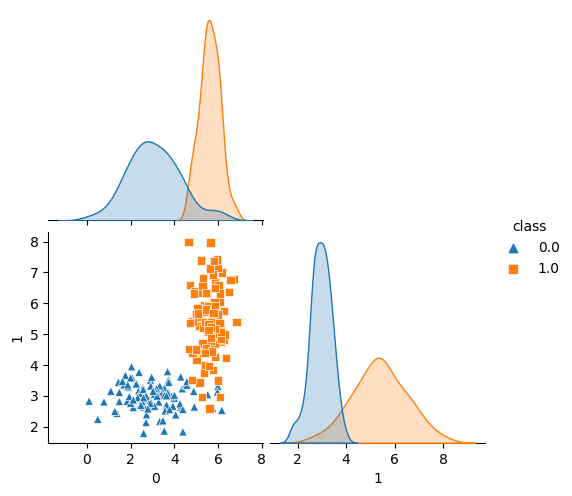

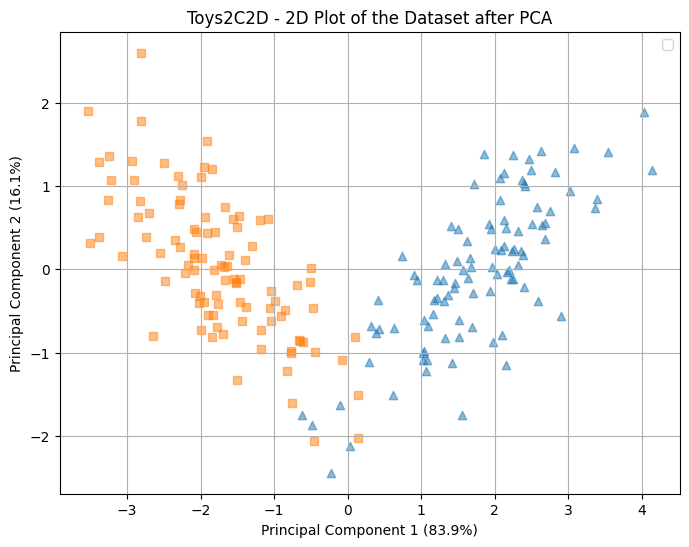

In [3]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])
c = 2

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [69]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [4.297260611703012, 4.297265162606879, 4.297334985224796, 4.297504814499941, 4.297524678295992, 4.297563746650262, 4.297576539556953, 4.297580141737883, 4.297599299248593, 4.29772209418753]
ARI values: [0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856]
NS values: [0.8585474732103126, 0.8582901876381759, 0.8581664004444692, 0.8740155313980039, 0.858045693499389, 0.8743118459122985, 0.874349789948696, 0.8579827558304501, 0.8579634807753458, 0.8598059808651128]
NMI values: [0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284]


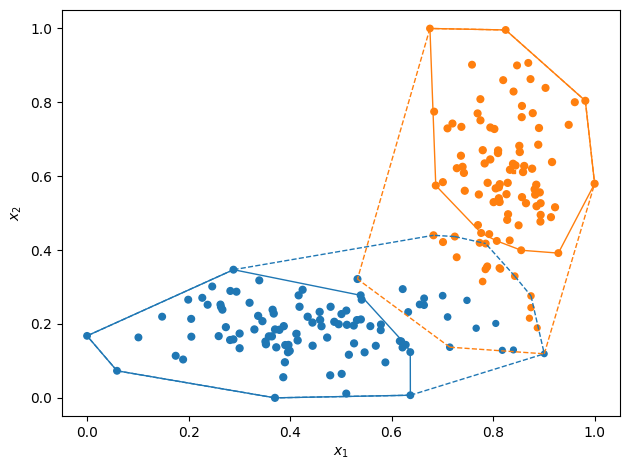

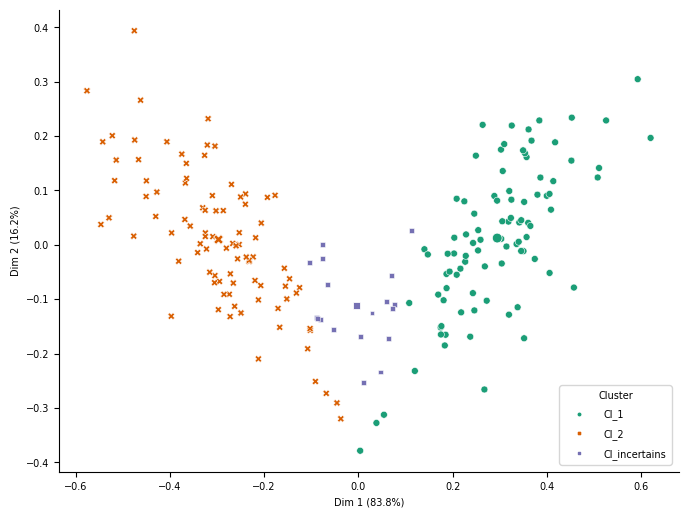

In [70]:
display_results_evidential(X, ecm_models, numeric_labels)

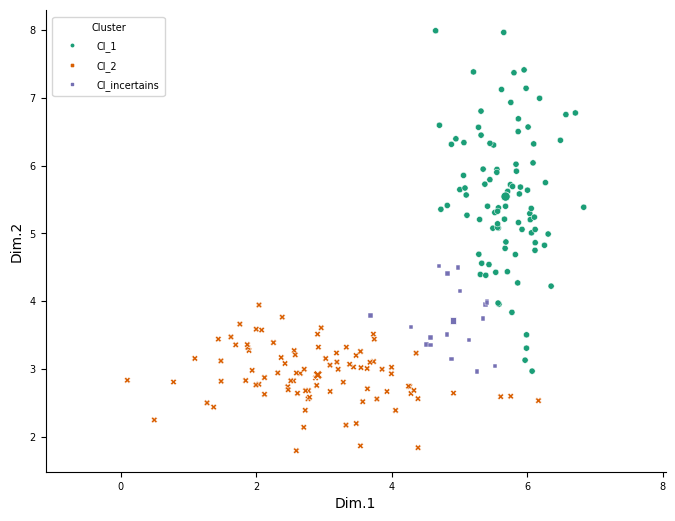

In [50]:
ev_plot_2D(data=dataset[:, :-1], x=ecm_models[0], normalize=False, cex=20)

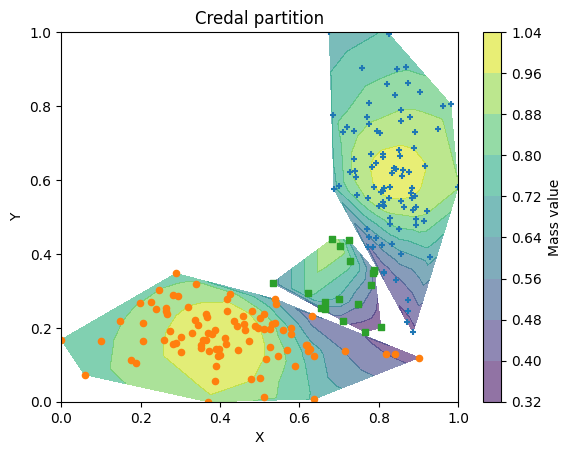

In [51]:
__credal_partition_contour_lines(ecm_models[0], X.values, ['+', 'o', 's'])

## Weighted ECM (WECM)

In [67]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])


J values: [0.5690411746966207, 0.5690722771618335, 0.5690771831143002, 0.5691032145057755, 0.5691154498644835, 0.5691259221383198, 0.5691260979705707, 0.569130940305732, 0.5746726266299186, 0.5747845695889343]
ARI values: [0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.9015263592862026, 0.8824407464468274, 0.8824407464468274]
NS values: [1.2039483235241843, 1.2019886647059665, 1.0124336279520778, 1.200424586084215, 1.1998002728817938, 1.011105908819389, 1.199319193293244, 1.0109786251206418, 0.9896611697191913, 1.1804898749362802]
NMI values: [0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8552449199812809, 0.8149890629501058, 0.8149890629501055]


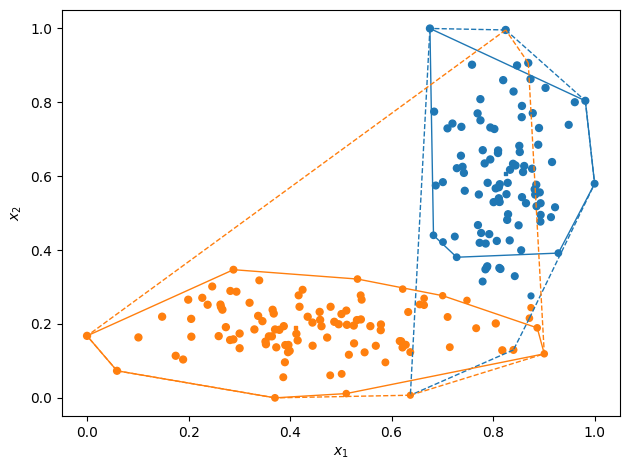

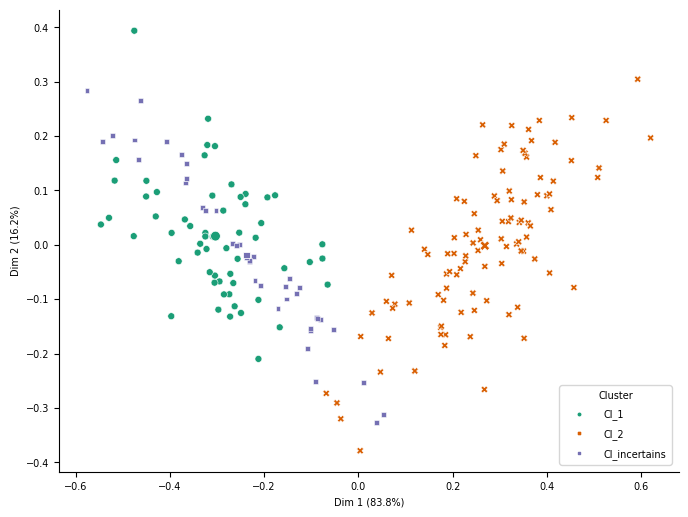

In [68]:
display_results_evidential(X, wecm_models, numeric_labels)

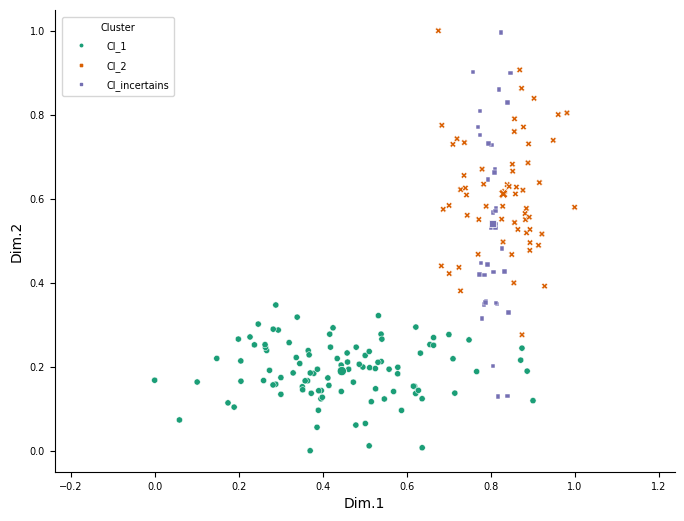

In [8]:
ev_plot_2D(data=X.values, x=wecm_models[0], normalize=False, cex=20)

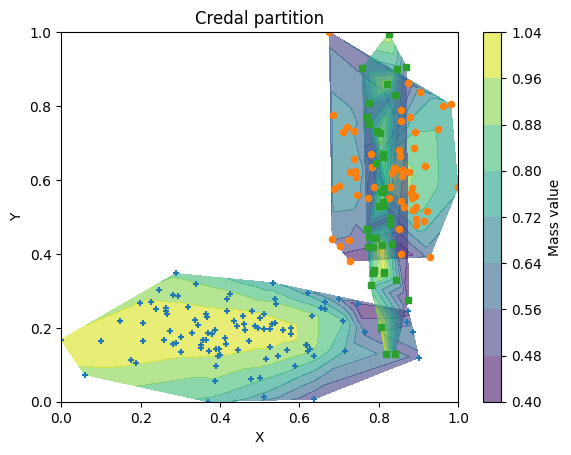

In [55]:
__credal_partition_contour_lines(wecm_models[0], X.values, ['+', 'o', 's'])

In [9]:
print(f"Top weights: {wecm_models[0]['W']}")
centers = wecm_models[0]['gplus']
print(f"Top centers: {centers}")
# plt.figure(figsize=(8, 6))
# plt.scatter(centers[:, 0], centers[:, 1], s=200)
# plt.show()

Top weights: [[0.1449675  0.8550325 ]
 [0.74926743 0.25073257]
 [0.98919612 0.01080388]]
Top centers: [[0.40868282 0.19092112]
 [0.82412392 0.60545819]
 [0.80923264 0.2208455 ]]


# Weighted FCM - Keller et al. 2000

In [65]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, w0=w0, init="None", verbose=True)
    keller_models = np.append(keller_models, model)

J values: [0.7088023516260571, 0.7088304424752832, 0.7088516187668815, 0.70873204744727, 0.7088657129124258, 0.7088459868133313, 0.7087975851714488, 0.7087974624194531, 0.7087760921758757, 0.7087386476593158]
ARI values: [0.8448775281781609, 0.9015253545556576, 0.9015253545556576, 0.8448775281781609, 0.8448775281781609, 0.9015253545556576, 0.8448775281781609, 0.9015253545556576, 0.8824395469850015, 0.8635569191338444]
NMI values: [0.7584955610075942, 0.831384137232772, 0.8313841372327718, 0.7584955610075942, 0.7584955610075942, 0.831384137232772, 0.7584955610075942, 0.8313841372327718, 0.8048496934897743, 0.7807654168335446]


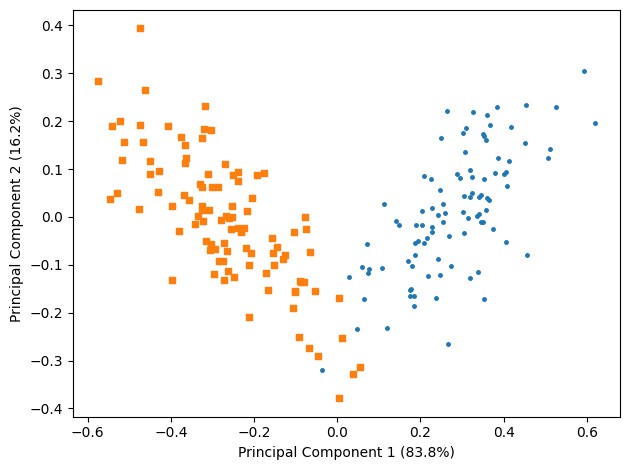

In [66]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [63]:
%%capture
wang_models = np.array([])
for i in range(5):
    model = fcm_wang2004(X, c, w_beta=3, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [1.3873508691635537, 1.3873858308271634, 1.3872841366541953, 1.3872715451656308, 1.3873434118472165]
ARI values: [0.8824395469850015, 0.8824395469850015, 0.8824396669322856, 0.8824396669322856, 0.8824396669322856]
NMI values: [0.8048496934897743, 0.8048496934897743, 0.8072262679734284, 0.8072262679734284, 0.8072262679734284]


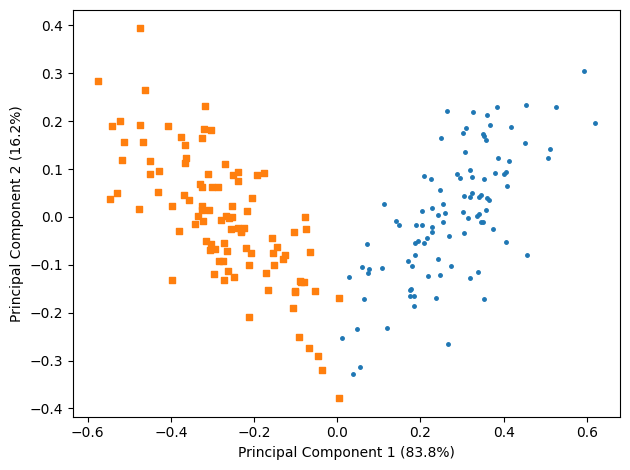

In [64]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [59]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)

J values: [7.21080720936353, 7.211013832984938, 7.210745727532841, 7.210950159821673, 7.210622363890398, 7.2107941236602535, 7.210794023330363, 7.21118708446342, 7.2108286785553, 7.2108095744730845]
ARI values: [0.8824395469850015, 0.8635567799204162, 0.8824395469850015, 0.8635567799204162, 0.8824395469850015, 0.8635567799204162, 0.8824395469850015, 0.8635567799204162, 0.8824395469850015, 0.8635567799204162]
NMI values: [0.8048496934897743, 0.7807787368096489, 0.8048496934897743, 0.7807787368096489, 0.8048496934897743, 0.7807787368096489, 0.8048496934897743, 0.7807787368096489, 0.8048496934897743, 0.7807787368096489]


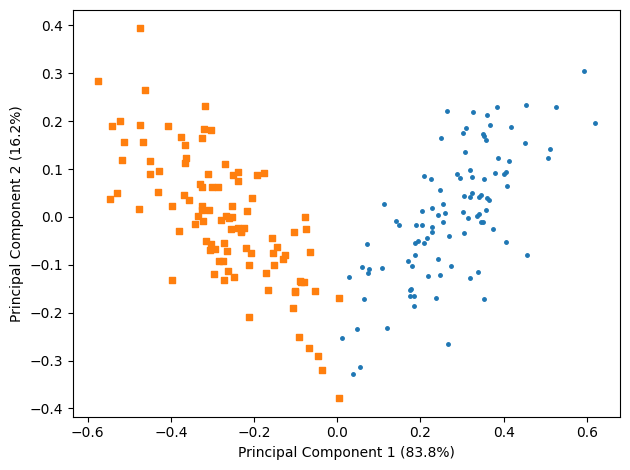

In [60]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [57]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)

J values: [0.7194795120098134, 0.7194618702082033, 0.7194581858025724, 0.7196313839066741, 0.7194936443146818, 0.7195976425320159, 0.7194766717806098, 0.7195076031586491, 0.7194513489462206, 0.7194533124265022]
ARI values: [0.8635576151967236, 0.8448775281781609, 0.8448775281781609, 0.8824395469850015, 0.8448775281781609, 0.8635576151967236, 0.8635569191338444, 0.8635569191338444, 0.8448775281781609, 0.8448775281781609]
NMI values: [0.7848448052631691, 0.7584955610075942, 0.7584955610075942, 0.8048496934897743, 0.7584955610075942, 0.7848448052631691, 0.7807654168335446, 0.7807654168335446, 0.7584955610075942, 0.7584955610075942]


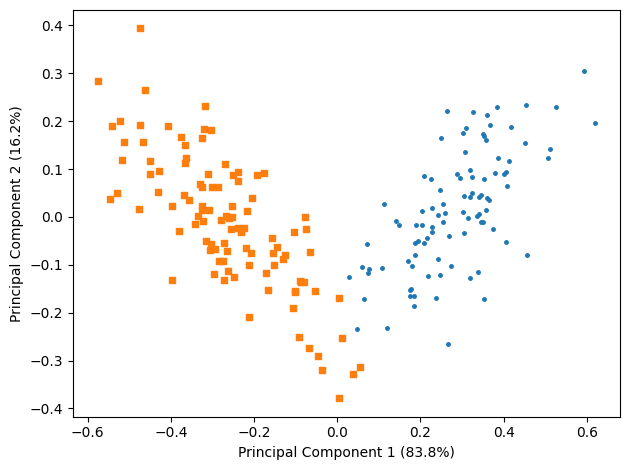

In [58]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [55]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [1.362909654385761, 1.3596119864824194, 1.3625867369534008, 1.3624598513451627, 1.3631223650213702, 1.3628933651691169, 1.3631227714900134, 1.3631310613573255, 1.3557127570018643, 1.3631083574041725]
ARI values: [0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.9015268616437867, 0.8824420658265663, 0.9015268616437867]
NMI values: [0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8552012564126975, 0.8341175157191941, 0.8552012564126975]


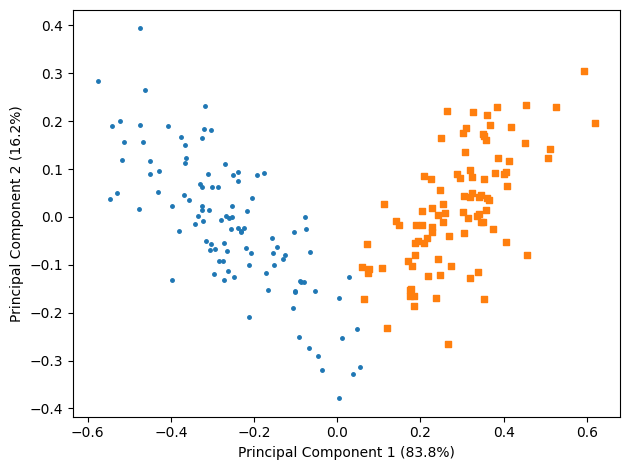

In [56]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [53]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [17.366530645860387, 17.36653489090222, 17.3663172206874, 17.35804381589402, 17.366039551685283, 17.36582649774987, 17.36615662742005, 17.366181615398446, 17.366079487114497, 17.366153668440134]
ARI values: [0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235, 0.8635606777890235]
NMI values: [0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188, 0.8142228113988188]


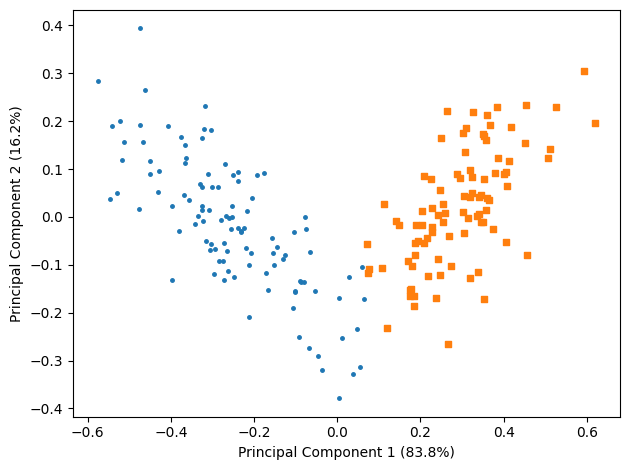

In [54]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)